## Introduction


In this Exercise I will use machine learning to classify images. There are three sets of images I read from urls: grass, sand and stairs images.
First I preprocess these images by resizing them to same size then grayscale and quantize them.
From thsese images I can extract 10 different features and use these features to train machine learning models. The models I will use in this exercise
are: Ridge classifier, Random Forest and Multi-Layer Perceptron. I will evaluate the performance of these models by calculating the accuracy and by finding
the best parameters.


Three sets of image URLs provided as text files (in Moodle): grass, sand and stairs

Images are with different resolution and dimensions
Images have been gathered from https://unsplash.com/

## Data preparation

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from PIL import Image, ImageOps
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from itertools import zip_longest
from sklearn.preprocessing import StandardScaler
import seaborn
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [80]:


"""
reference for PIL documentation: https://pillow.readthedocs.io/en/stable/reference/Image.html
"""

def images_from_urls(url_array, stored_images):
    """
    Read image from url and add the image to pandas series
    args:
    url_array: array_that contains urls of a imageset
    stored_images: images are added to pandas series
    """
    for i in range(url_array.shape[0]):
        url = url_array[i]
        #read the image from url
        img = imageio.imread(url)
        #change image to pil_image
        pil_image = Image.fromarray(img)
        #add image to series
        stored_images.loc[i] = pil_image




In [81]:
#Load txt files
grass = np.loadtxt("grass.txt", dtype="U150")
sand = np.loadtxt("sand.txt", dtype="U150")
stairs = np.loadtxt("stairs.txt", dtype="U150")


#Empty pandas series that are used to store the original images
rgb_grass_series = pd.Series()
rgb_sand_series = pd.Series()
rgb_stairs_series = pd.Series()

images_from_urls(grass, rgb_grass_series)
images_from_urls(sand, rgb_sand_series)
images_from_urls(stairs, rgb_stairs_series)

In [82]:
# Loop to find the smallest image width and image height
for i in range(grass.shape[0]):
    grass_w, grass_h = rgb_grass_series.loc[i].size
    if i == 0:
        min_grass_w = grass_w
        min_grass_h = grass_h
    min_grass_w = min(min_grass_w, grass_w)
    min_grass_h = min(min_grass_h, grass_h)

for j in range(sand.shape[0]):
    sand_w, sand_h = rgb_sand_series.loc[j].size
    if j == 0:
        min_sand_w = sand_w
        min_sand_h = sand_h

for k in range(stairs.shape[0]):
    stairs_w, stairs_h = rgb_stairs_series.loc[k].size
    if k == 0:
        min_stairs_w = stairs_w
        min_stairs_h = stairs_h
        
    min_stairs_w = min(min_stairs_w, stairs_w)
    min_stairs_h = min(min_stairs_h, stairs_h)
    


min_width = min(min_grass_w, min_sand_w, min_stairs_w)
min_height = min(min_grass_h, min_sand_h, min_stairs_h)



In [83]:
def grayscale_resize(rgb_image_series, gray_image_series, min_w, min_h):
    """
    Grayscales, resizes and quantizes all the images for given pandas series
    args:
    rgb_image_series: pandas series that contain images for a given imgae set
    gray_image_series: pandas series for which processed images are added
    min_w: minimum width used for image resizing
    min_h: minimum height used for image resizing
    """
    for i in range(rgb_image_series.shape[0]):
        #resizes the image
        resized_img = rgb_image_series.loc[i].resize((min_w, min_h))
        #Changes the image to grayscale
        gray_img = ImageOps.grayscale(resized_img)
        #Quantizes the image to 8 levels
        gray_img = gray_img.quantize(8)
        #adds The image to pandas series
        gray_image_series.loc[i] = gray_img

In [84]:
#Empty pandas series that are used to store the grey resized images.
grey_grass_series = pd.Series()
grey_sand_series = pd.Series()
grey_stairs_series = pd.Series()

grayscale_resize(rgb_grass_series, grey_grass_series, min_width, min_height)
grayscale_resize(rgb_sand_series, grey_sand_series, min_width, min_height)
grayscale_resize(rgb_stairs_series, grey_stairs_series, min_width, min_height)

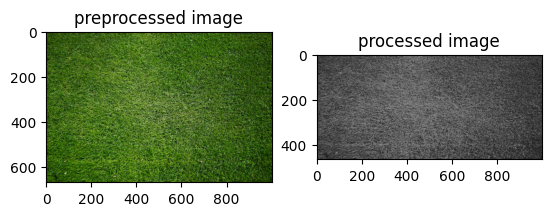

In [133]:
#Plot to compare one original picture and processed image
fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb_grass_series.loc[0], cmap="grey")
ax[1].imshow(grey_grass_series.loc[0])
ax[0].set_title("preprocessed image")
ax[1].set_title("processed image")
plt.show()



## Feature extraction

### First order texture measures (6 features)

In [88]:

#Emptly lists for image features
grass_features = []
sand_features = []
stairs_features = []

#The image arrays are three dimensional where one dimension is the color channel
#The images I use are the original rgb images without resizing.
for i in range(grass.shape[0]):
    grass_array = np.array(rgb_grass_series.loc[i])
    #This gives the mean values of R, G and B colors
    grass_mean = np.mean(grass_array, axis=(0,1))
    grass_var = np.var(grass_array, axis=(0,1))
    #stack the mean and variances to same array
    g = np.hstack((grass_mean, grass_var))
    grass_features.append(g)

#Same for sand images
for j in range(sand.shape[0]):
    sand_array = np.array(rgb_sand_series.loc[j])
    sand_mean = np.mean(sand_array, axis=(0,1))
    sand_var = np.var(sand_array, axis=(0,1))
    s = np.hstack((sand_mean, sand_var))
    sand_features.append(s)
#Same for stairs images
for k in range(stairs.shape[0]):
    stairs_array = np.array(rgb_stairs_series.loc[k])
    stairs_mean = np.mean(stairs_array, axis=(0,1))
    stairs_var = np.var(stairs_array, axis=(0,1))
    st = np.hstack((stairs_mean, stairs_var))
    stairs_features.append(st)
# Chagne the lists to numpy array
grass_features = np.array(grass_features)
sand_features = np.array(sand_features)
stairs_features = np.array(stairs_features)


### Second order texture measures (4 features)

In [ ]:

#Lists for correlation features 
grass_features_GLCM = []
sand_features_GLCM = []
stairs_features_GLCM = []



for i in range(grass.shape[0]):
    #Horizontal angle is zero and vertical is pi/2 in radians
    #For texture calculations matrix need to be symmetric and normalized
    grass_GLCM = graycomatrix(np.array(grey_grass_series.loc[i]), distances = [2,10],angles=[0, np.pi/2], symmetric=True, normed=True)
    grass_correlation = graycoprops(grass_GLCM,"correlation")
    #The correlation matrix is 2x2 matrix so I have to ravel it to change the dimension to 1
    grass_features_GLCM.append(grass_correlation.ravel())

#Same for sand images
for j in range(sand.shape[0]):
    sand_GLCM = graycomatrix(np.array(grey_sand_series.loc[j]), distances = [2,10],angles=[0, np.pi/2], symmetric=True, normed=True)
    sand_correlation = graycoprops(sand_GLCM,"correlation")
    sand_features_GLCM.append(sand_correlation.ravel())

#Same for stairs images
for k in range(stairs.shape[0]):
    stairs_GLCM = graycomatrix(np.array(grey_stairs_series.loc[k]), distances = [2,10],angles=[0, np.pi/2], symmetric=True, normed=True)
    stairs_correlation = graycoprops(stairs_GLCM,"correlation")
    stairs_features_GLCM.append(stairs_correlation.ravel())

grass_features_GLCM = np.array(grass_features_GLCM)
sand_features_GLCM = np.array(sand_features_GLCM)
stairs_features_GLCM = np.array(stairs_features_GLCM)




Distances are used to measure the roughness or the smoothness of the image in a different way. Small distance measures the local brightness differences
and large distance measures more global brightness differences. Here I used distance 2 to measure the brigthness contrast in a small area of the image
and distance 10 to measure the overall rougness or smoothness of the image. 


In [92]:
#Stacks the first order and second order texture features into one array
X_grass = np.hstack((grass_features, grass_features_GLCM))
X_sand = np.hstack((sand_features, sand_features_GLCM))
X_stairs = np.hstack((stairs_features, stairs_features_GLCM))

#Combines the features of grass, sand and stairs into one input array
X = np.vstack((X_grass,X_sand, X_stairs))

#Scales the values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Makes a dataframe of the input arrray and name the columns. Here D1 and A1 means the first distance and angle of the graycomatrix
#and D2 and A2 means the second distance and angle
X_df = pd.DataFrame(X_scaled, columns = ["R mean", "G mean", "B mean", "R var", "G var", "B var", "D1A1", "D2A1", "D1A2", "D2A2"])


In [93]:
#Make an output array of the image types.
y_grass = np.array(grass.shape[0]*["grass"])
y_sand = np.array(sand.shape[0]*["sand"])
y_stairs = np.array(stairs.shape[0]*["stairs"])
y_grass = np.reshape(y_grass, (grass.shape[0],1))
y_sand = np.reshape(y_sand, (sand.shape[0],1))
y_stairs = np.reshape(y_stairs, (stairs.shape[0],1))

y = np.vstack((y_grass, y_sand, y_stairs))

#Make a dataframe for the output array
y_df = pd.DataFrame(y, columns=["class"])

#Combine the input and output dataframe for plotting
data_df = pd.concat([X_df,y_df], axis=1)



## Feature relationships

### Pairplot


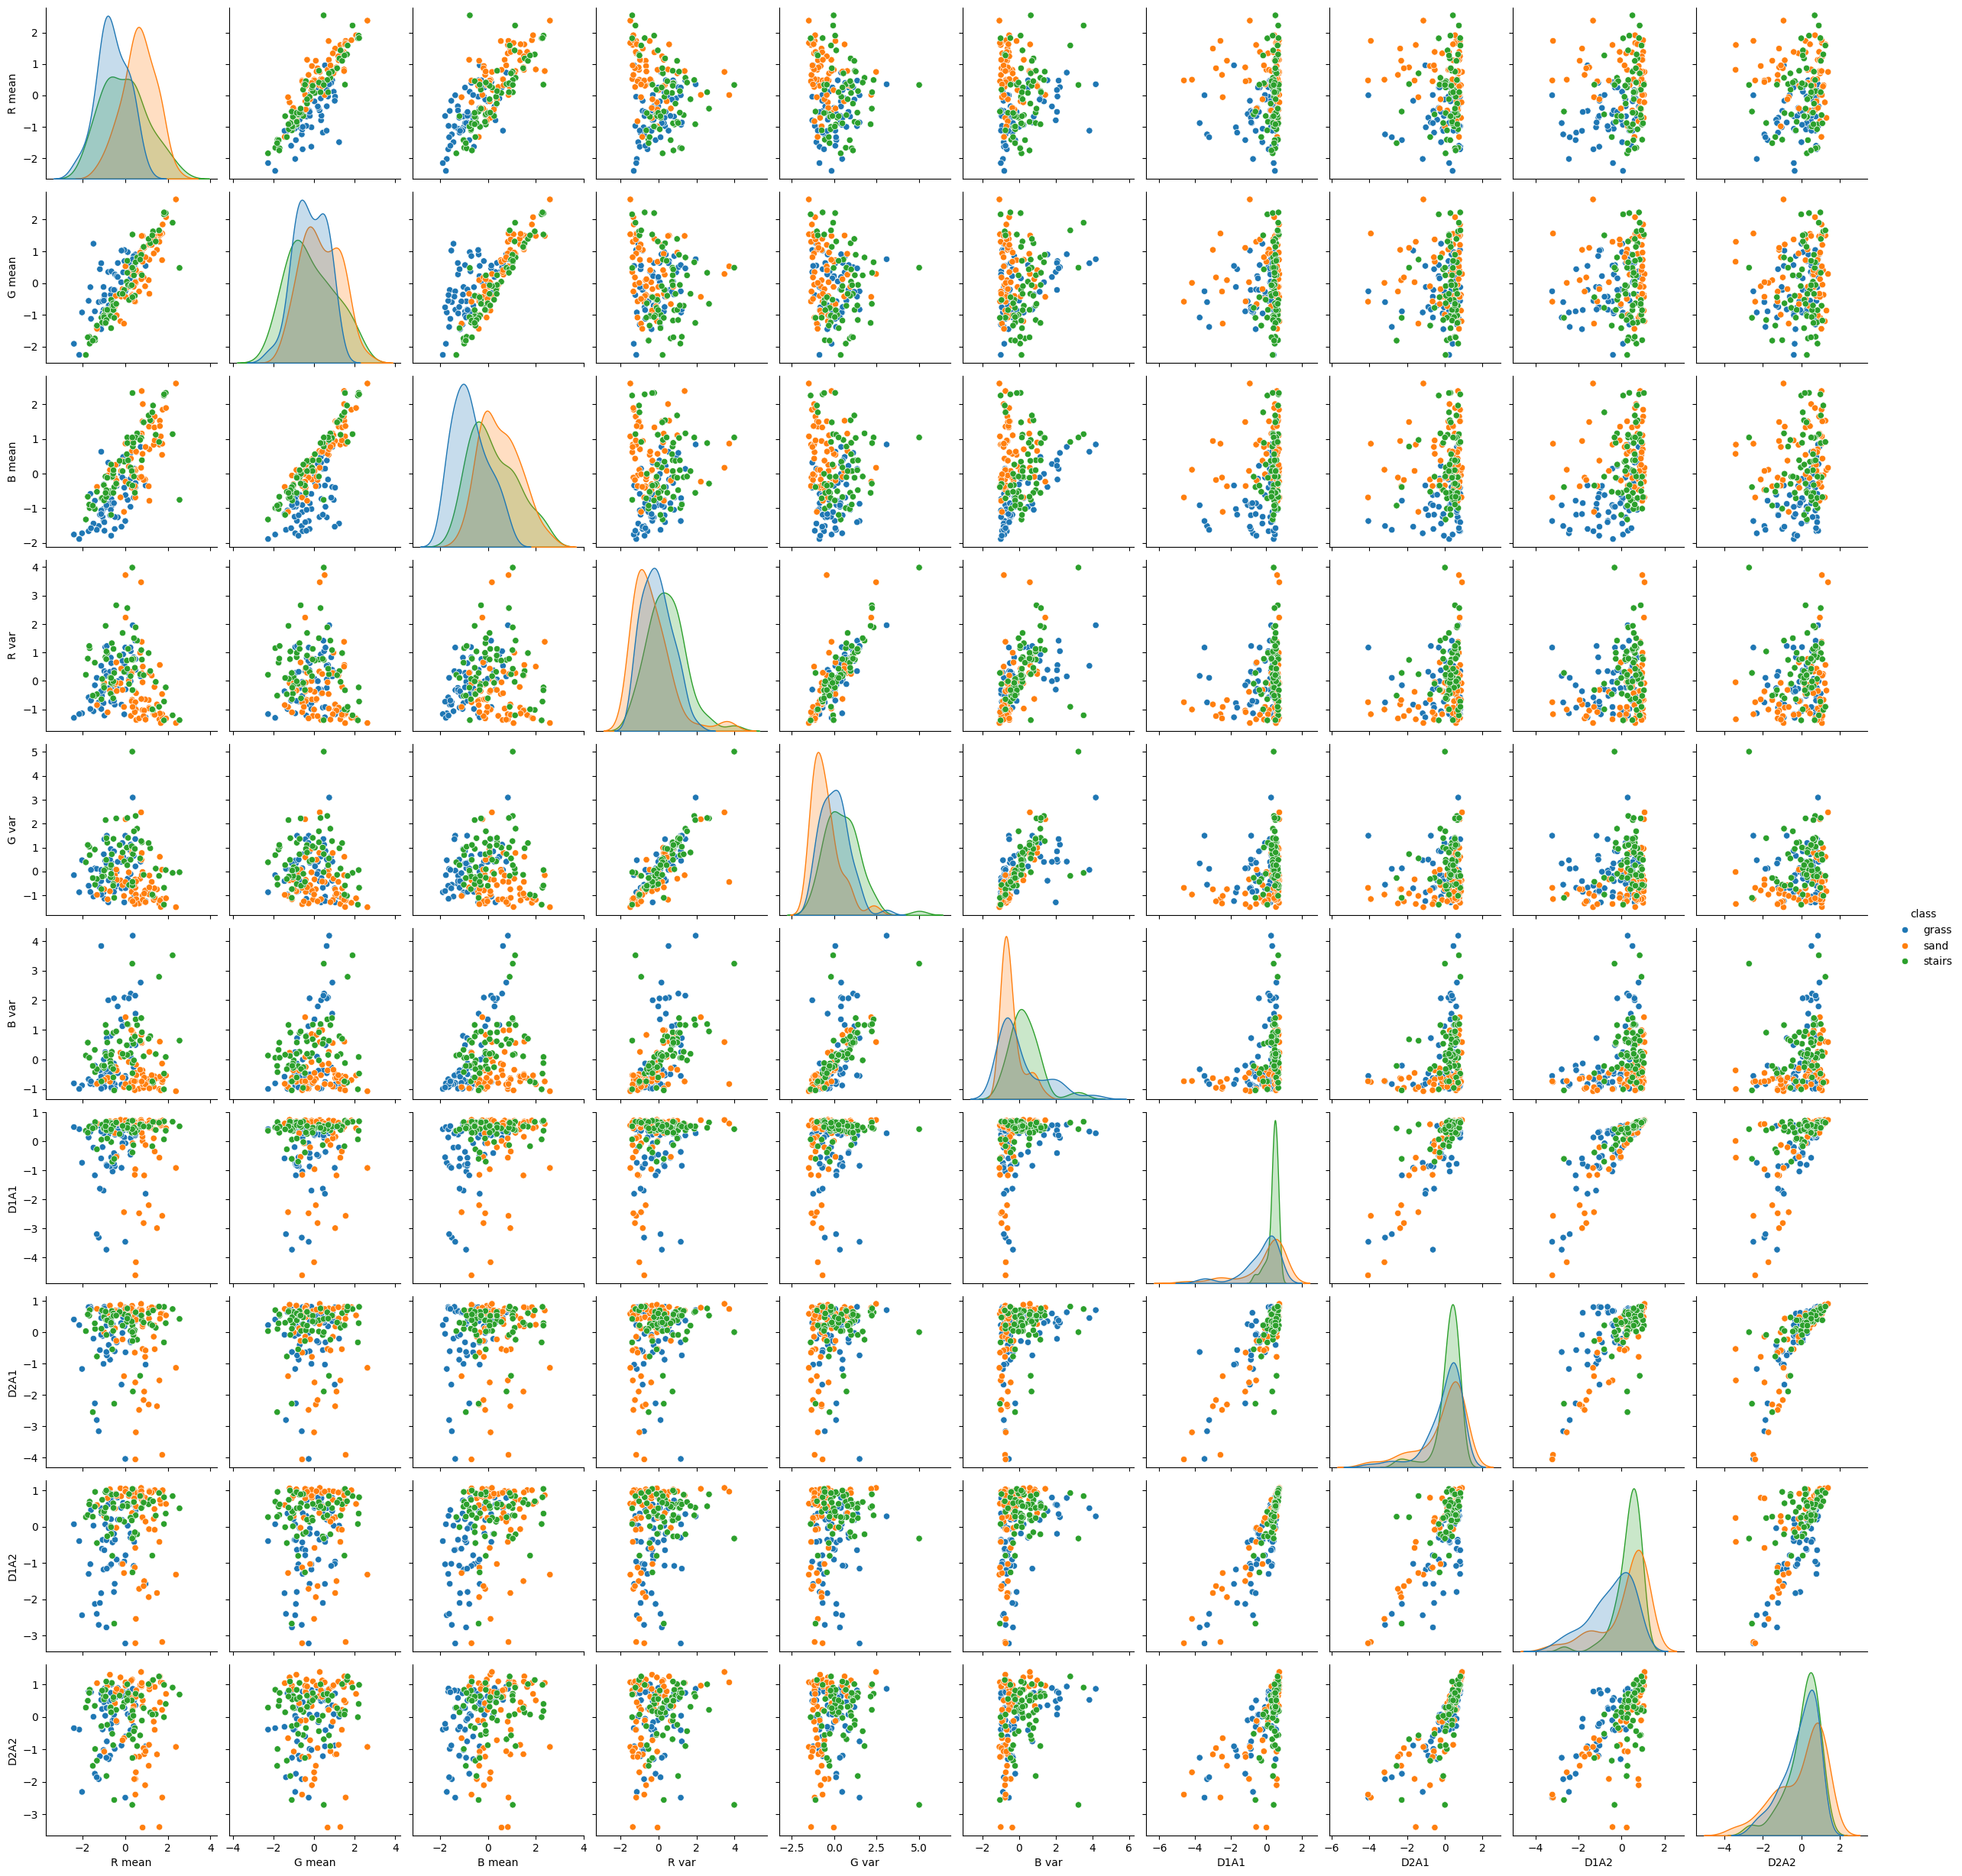

'\nFeature pairs that are correlated: (G mean, R mean), (B mean, R mean), (B mean, G mean), (G var, R var), (B var, G var), (B var, R var)\n'

In [96]:
#Plot all the pairplots using the dataframe that has input and output array
seaborn.pairplot(data_df, hue="class")
plt.show()

"""
Feature pairs that are correlated: (G mean, R mean), (B mean, R mean), (B mean, G mean), (G var, R var), (B var, G var), (B var, R var)
"""

### Histograms


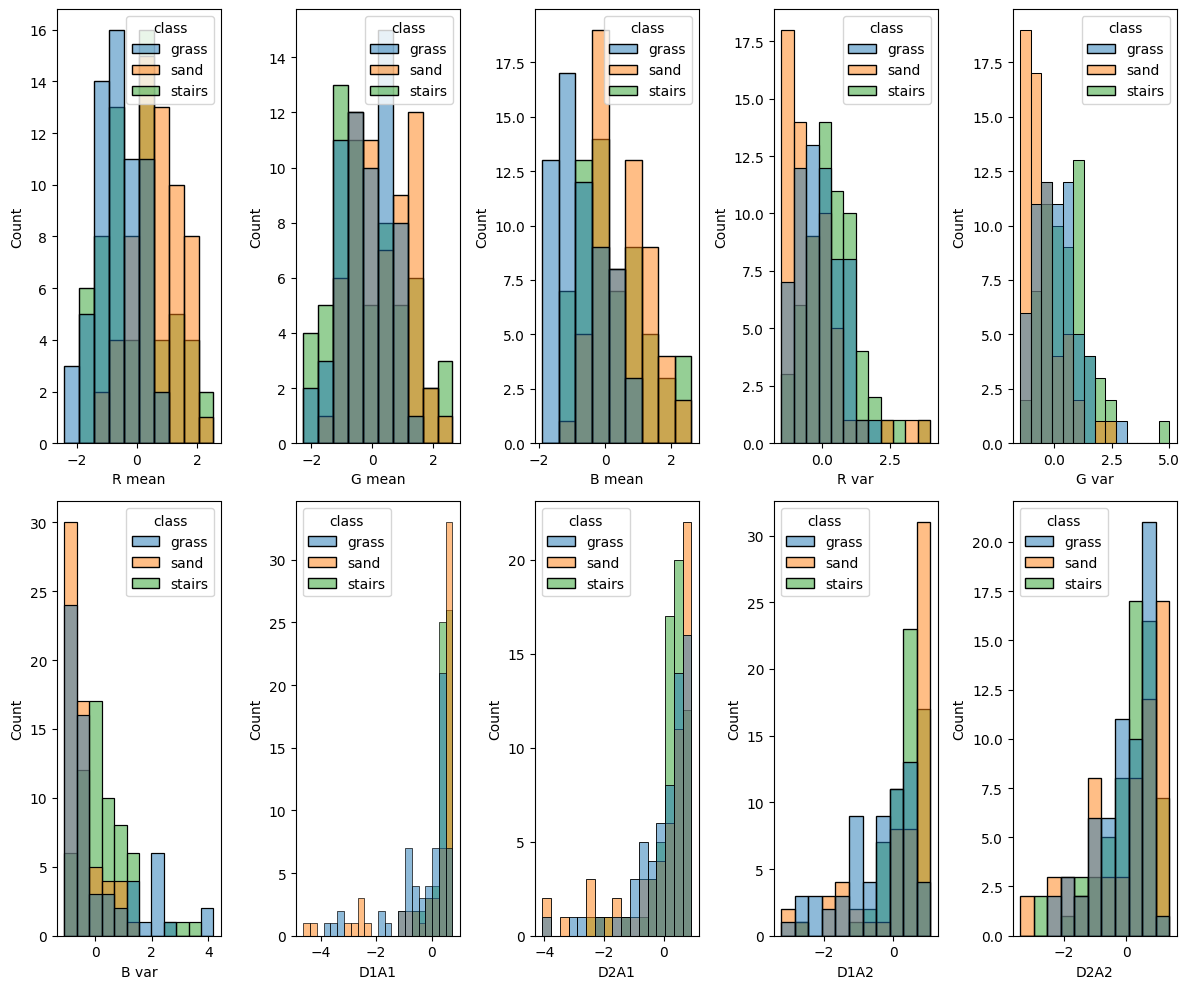

In [ ]:
columns = data_df.columns
columns = columns[:-1]


fig, axs = plt.subplots(2,5, figsize=(12,10))

for column, ax in zip(columns, axs.flat):
    seaborn.histplot(data_df, x=column, hue="class", ax=ax)

plt.tight_layout()
plt.show()



The second order features are ovelapping the most. The features that have the most contrast between the classes are the mean features.


### PCA

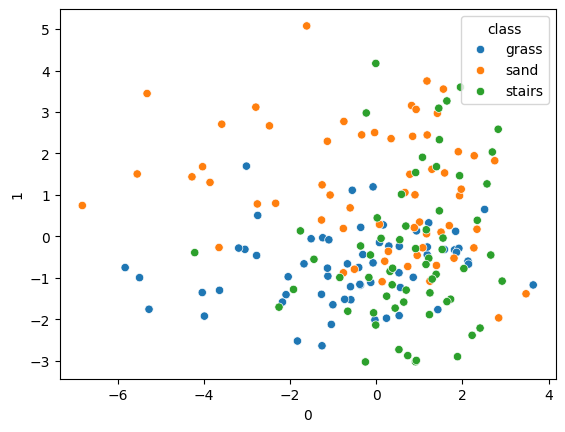

In [101]:

#Dimensionality reduction of the scaled data with pca
pca_fit = PCA(n_components=2)

#fit the output data to the pca
pca = pca_fit.fit_transform(X_df)


pca_df = pd.DataFrame(pca)

pca_df = pd.concat([pca_df,y_df], axis=1)


#Plot the pca data
fig = plt.figure()
seaborn.scatterplot(pca_df, x=0,y=1, hue="class")
plt.show()




It is hard to see any separate clusters in the data but the in the single cluster the classes are centered around differnt points.
According to this plot the images are hard to classify to different types


## Build classifiers and select the best hyperparameters with cross validation

In [ ]:
#Cross-validator
skf = StratifiedKFold(n_splits=5)

#Ridge classifier
ridge = RidgeClassifier()

#Parameter grid
r_param = {"alpha": [0.001, 0.01, 0.1, 1.0]}



r_grid_search = GridSearchCV(ridge, param_grid = r_param, cv=skf)

#Fit the scaled input data and output data
r_grid_search.fit(X_scaled, np.ravel(y))




ridge_results_df = pd.DataFrame.from_dict(r_grid_search.cv_results_)


#Selected hyperparameters and mean accuracy for each parameter
display(ridge_results_df.loc[:,["params", "mean_test_score"]])


,params,mean_test_score
0,{'alpha': 0.001},0.794595
1,{'alpha': 0.01},0.794595
2,{'alpha': 0.1},0.794595
3,{'alpha': 1.0},0.800000


In [105]:
#Random forest
rfc = RandomForestClassifier()

#Parameter grid
rfc_param = {"n_estimators":[100,150,200,250,300], "max_features": ['sqrt', 'log2', None], "bootstrap": [True, False]}

rfc_grid_search = GridSearchCV(rfc, param_grid = rfc_param, cv=skf)

rfc_grid_search.fit(X_scaled, np.ravel(y))


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [106]:
rfc_results_df = pd.DataFrame.from_dict(rfc_grid_search.cv_results_)

#Selected hyperparameters and mean accuracy for each parameter
display(rfc_results_df.loc[:,["params", "mean_test_score"]])



,params,mean_test_score
0,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.794595
1,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.778378
2,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.783784
3,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.789189
4,"{'bootstrap': True, 'max_features': 'sqrt', 'n...",0.794595
5,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.783784
6,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.778378
7,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.772973
8,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.789189
9,"{'bootstrap': True, 'max_features': 'log2', 'n...",0.778378


In [ ]:


print("Feature importance:")
print(rfc_grid_search.best_estimator_.feature_importances_)



Feature importance:
[0.1135309  0.07941607 0.17543175 0.05708391 0.07795729 0.16933968
 0.11845558 0.05379841 0.10057021 0.0544162 ]


'\nThe index of the most important feature is 2 and that corresponds to mean value of the color blue\n'

The index of the most important feature is 2 and that corresponds to mean value of the color blue

In [ ]:
#MlP



mlp = MLPClassifier(max_iter=2500)

#Parameter grid
mlp_param = {"hidden_layer_sizes": [(15,),(20,),(25,),(30,),(35,),(40,)], "activation": ['tanh', 'relu'], "solver": ['sgd','adam'], "validation_fraction": [0.1, 0.3], "alpha": [0.01,0.1,1]}

mlp_grid_search = GridSearchCV(mlp, param_grid = mlp_param, cv=skf)

mlp_grid_search.fit(X, np.ravel(y))



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=2500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.01, 0.1, 1],
                         'hidden_layer_sizes': [(15,), (20,), (25,), (30,),
                                                (35,), (40,)],
                         'solver': ['sgd', 'adam'],
                         'validation_fraction': [0.1, 0.3]})

In [109]:
mpl_results_df = pd.DataFrame.from_dict(mlp_grid_search.cv_results_)


display(mpl_results_df.loc[:, ["params", "mean_test_score"]])

,params,mean_test_score
0,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.486486
1,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.427027
2,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.572973
3,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.481081
4,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.491892
...,...,...
139,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.297297
140,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.340541
141,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.356757
142,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.437838


## Discussion

In this project machine learning models were trained to classify images to categories: grass, sand and stairs.
Ten different features were extracted from the images and the relations were visualized using pairplot, histograms and PCA. From the PCA plot we saw that the classes are not well separated, meaning that the images will be difficult to classify by the models.
Using the image feature data, Ridge, Random Forest and MLP classifiers were trained with cross-validation to find the best hyperparameters to optimize the models. From the results we can see that the Random Forest model performed the best.